In [1]:
import os
import random
import math
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Parámetros
NUM_CITIES = 20
POP_SIZE = 10
MUT_PROB = 0.2
GENERATIONS = 200

In [6]:
# Generar ciudades aleatorias en el plano
cities = [(int(random.uniform(0, 100)), int(random.uniform(0, 100))) for _ in range(NUM_CITIES)]
cities

[(1, 35),
 (27, 37),
 (66, 75),
 (19, 19),
 (14, 96),
 (30, 72),
 (51, 6),
 (22, 24),
 (61, 72),
 (96, 74),
 (61, 81),
 (90, 91),
 (4, 39),
 (26, 41),
 (28, 63),
 (35, 83),
 (28, 51),
 (76, 83),
 (62, 73),
 (81, 13)]

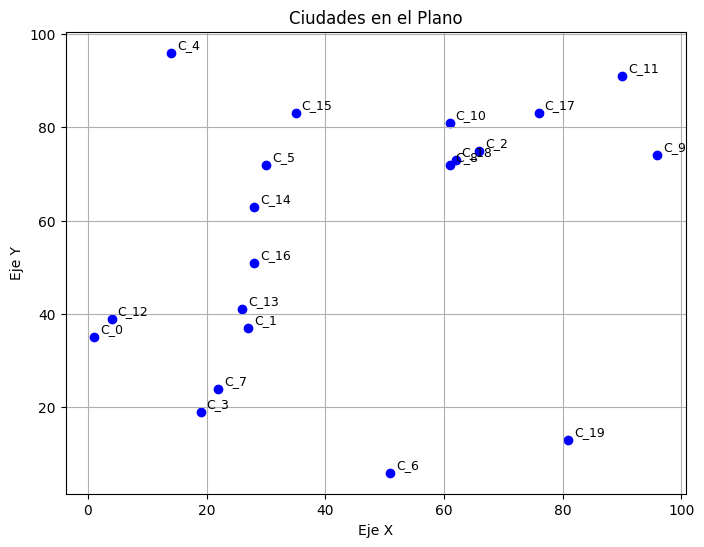

In [7]:
def city_visualization(cities):
    """
    Crea un DataFrame a partir de coordenadas y grafica las ciudades con etiquetas.

    Args:
        cities (List[Tuple[int, int]]): Lista de tuplas (x, y) representando coordenadas de ciudades.

    Returns:
        pd.DataFrame: DataFrame con índice nombrado, y columnas 'coordenada_x' y 'coordenada_y'.
    """
    indices = [f"C_{i}" for i in range(len(cities))]
    df = pd.DataFrame(cities, columns=["coordenada_x", "coordenada_y"], index=indices)

    # Graficar puntos
    plt.figure(figsize=(8, 6))
    plt.scatter(df["coordenada_x"], df["coordenada_y"], c='blue')

    # Etiquetar puntos
    for idx, row in df.iterrows():
        plt.text(row["coordenada_x"] + 1, row["coordenada_y"] + 1, idx, fontsize=9)

    plt.xlabel("Eje X")
    plt.ylabel("Eje Y")
    plt.title("Ciudades en el Plano")
    plt.grid(True)
    plt.show()

    return df
city_df = city_visualization(cities)

In [8]:
def distance(a, b):
    """Calcula la distancia euclidiana entre dos ciudades."""
    return math.hypot(a[0] - b[0], a[1] - b[1])

def total_distance(path):
    """Calcula la distancia total del recorrido (camino cerrado)."""
    return sum(distance(cities[path[i]], cities[path[(i + 1) % NUM_CITIES]]) for i in range(NUM_CITIES))

def fitness(path):
    """La aptitud es inversamente proporcional a la distancia total."""
    return 1 / total_distance(path)

def random_individual():
    """Crea una permutación aleatoria de ciudades (un camino)."""
    individual = list(range(NUM_CITIES))
    random.shuffle(individual)
    return individual

def tournament_selection(population):
    """Selecciona el mejor entre dos individuos aleatorios."""
    a, b = random.sample(population, 2)
    return a if fitness(a) > fitness(b) else b

def crossover(parent1, parent2):
    """
    Cruce por orden (Order Crossover - OX): mantiene parte del primer padre y 
    rellena el resto en orden desde el segundo padre.
    """
    start, end = sorted(random.sample(range(NUM_CITIES), 2))
    child = [None] * NUM_CITIES
    child[start:end] = parent1[start:end]
    ptr = 0
    for city in parent2:
        if city not in child:
            while child[ptr] is not None:
                ptr += 1
            child[ptr] = city
    return child

def mutate(individual):
    """Intercambia dos ciudades aleatoriamente con cierta probabilidad."""
    if random.random() < MUT_PROB:
        i, j = random.sample(range(NUM_CITIES), 2)
        individual[i], individual[j] = individual[j], individual[i]
    return individual

def fitness_evolution_visualization(best_distances):
    """
    Grafica la evolución de la función de aptitud (fitness) durante las generaciones.

    Args:
        best_distances (List[float]): Lista de las mejores distancias por generación.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(best_distances, marker='o', linestyle='-')
    plt.xlabel("Generación")
    plt.ylabel("Distancia más corta")
    plt.title("Evolución del Camino Más Corto (TSP)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [9]:
# Inicializar población
population = [random_individual() for _ in range(POP_SIZE)]
population

[[16, 5, 8, 19, 7, 11, 4, 14, 1, 2, 10, 9, 6, 15, 12, 18, 3, 0, 13, 17],
 [16, 11, 4, 13, 6, 14, 9, 3, 1, 12, 10, 8, 18, 7, 15, 19, 17, 2, 0, 5],
 [3, 16, 18, 10, 14, 4, 11, 0, 2, 7, 13, 19, 17, 5, 9, 8, 6, 12, 1, 15],
 [19, 0, 1, 2, 13, 16, 10, 11, 9, 3, 15, 4, 5, 17, 12, 18, 6, 7, 14, 8],
 [13, 19, 1, 9, 17, 7, 3, 18, 14, 8, 6, 4, 5, 12, 15, 2, 16, 0, 10, 11],
 [2, 7, 0, 17, 10, 6, 8, 15, 16, 14, 11, 18, 5, 13, 12, 1, 19, 9, 3, 4],
 [16, 12, 3, 9, 11, 5, 1, 4, 10, 6, 0, 18, 13, 15, 17, 8, 7, 14, 19, 2],
 [18, 10, 8, 2, 6, 11, 9, 3, 1, 0, 12, 5, 7, 13, 17, 15, 14, 16, 4, 19],
 [15, 12, 2, 10, 1, 11, 14, 19, 7, 3, 0, 6, 8, 16, 4, 13, 9, 17, 18, 5],
 [0, 12, 5, 13, 1, 14, 7, 3, 9, 8, 6, 10, 2, 11, 16, 18, 15, 19, 4, 17]]

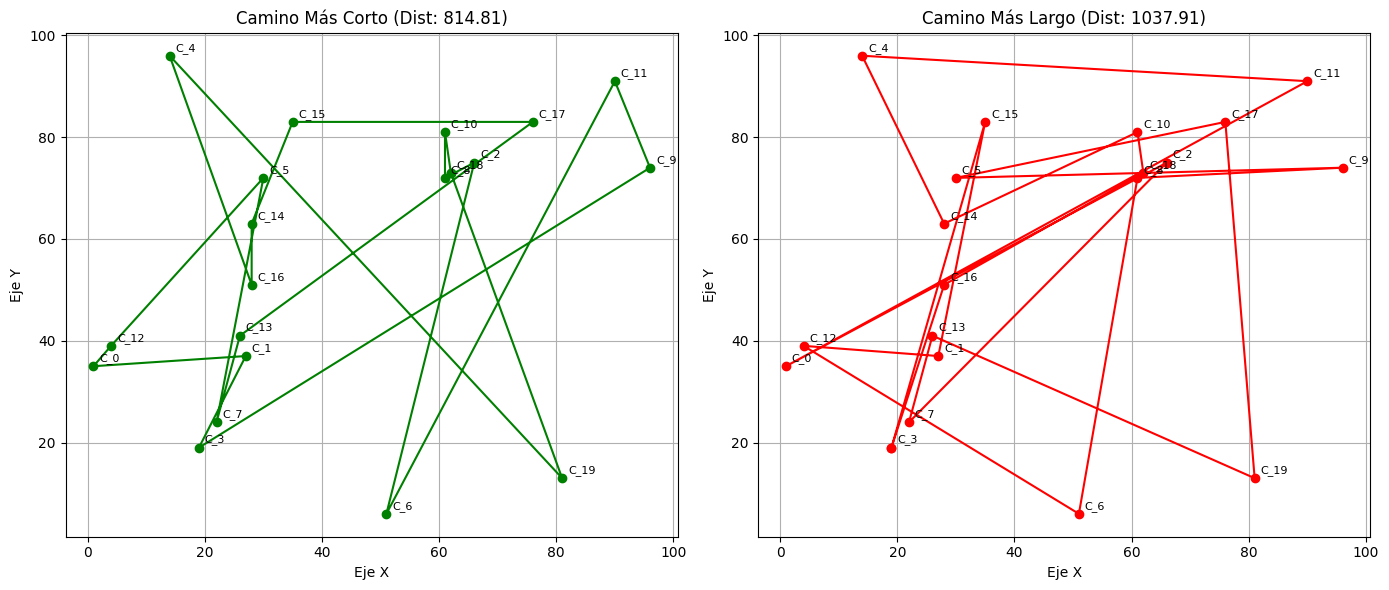

In [10]:
def initial_population_visualization(population, cities):
    """
    Visualiza los caminos más corto y más largo de una población inicial.

    Args:
        population (List[List[int]]): Lista de individuos (permutaciones de índices de ciudades).
        cities (List[Tuple[int, int]]): Lista de coordenadas (x, y) de las ciudades.
    """
    # Calcular distancias para todos los individuos
    distances = [total_distance(individual) for individual in population]
    
    # Encontrar los caminos mínimo y máximo
    shortest_idx = distances.index(min(distances))
    longest_idx = distances.index(max(distances))
    
    shortest_path = population[shortest_idx]
    longest_path = population[longest_idx]

    def plot_path(path, title, color):
        x = [cities[i][0] for i in path + [path[0]]]
        y = [cities[i][1] for i in path + [path[0]]]
        plt.plot(x, y, marker='o', color=color)
        for i, city in enumerate(path):
            cx, cy = cities[city]
            plt.text(cx + 1, cy + 1, f"C_{city}", fontsize=8)

        plt.title(f"{title} (Dist: {total_distance(path):.2f})")
        plt.xlabel("Eje X")
        plt.ylabel("Eje Y")
        plt.grid(True)

    # Crear figura con dos subplots
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plot_path(shortest_path, "Camino Más Corto", 'green')

    plt.subplot(1, 2, 2)
    plot_path(longest_path, "Camino Más Largo", 'red')

    plt.tight_layout()
    plt.show()
initial_population_visualization(population, cities)


In [11]:
# Evolución
# Crear carpeta si no existe
os.makedirs("path_evolution", exist_ok=True)


best_distances = []
best_paths = []  # Para guardar los caminos más cortos de cada generación

# Evolución
for gen in range(GENERATIONS):
    new_population = []
    for _ in range(POP_SIZE):
        p1 = tournament_selection(population)
        p2 = tournament_selection(population)
        child = crossover(p1, p2)
        child = mutate(child)
        new_population.append(child)
    population = new_population
    best = min(population, key=total_distance)
    best_paths.append(best[:])  # Copia del camino
    best_distances.append(total_distance(best))
    print(f"Gen {gen + 1}: Mejor distancia = {total_distance(best):.2f}")





Gen 1: Mejor distancia = 709.77
Gen 2: Mejor distancia = 757.28
Gen 3: Mejor distancia = 734.58
Gen 4: Mejor distancia = 729.33
Gen 5: Mejor distancia = 729.33
Gen 6: Mejor distancia = 729.33
Gen 7: Mejor distancia = 720.48
Gen 8: Mejor distancia = 706.39
Gen 9: Mejor distancia = 725.91
Gen 10: Mejor distancia = 725.91
Gen 11: Mejor distancia = 741.43
Gen 12: Mejor distancia = 695.58
Gen 13: Mejor distancia = 695.58
Gen 14: Mejor distancia = 682.06
Gen 15: Mejor distancia = 695.58
Gen 16: Mejor distancia = 728.44
Gen 17: Mejor distancia = 657.58
Gen 18: Mejor distancia = 634.07
Gen 19: Mejor distancia = 628.71
Gen 20: Mejor distancia = 634.07
Gen 21: Mejor distancia = 634.07
Gen 22: Mejor distancia = 620.88
Gen 23: Mejor distancia = 620.88
Gen 24: Mejor distancia = 620.88
Gen 25: Mejor distancia = 620.88
Gen 26: Mejor distancia = 620.88
Gen 27: Mejor distancia = 620.66
Gen 28: Mejor distancia = 590.16
Gen 29: Mejor distancia = 590.16
Gen 30: Mejor distancia = 559.49
Gen 31: Mejor dista

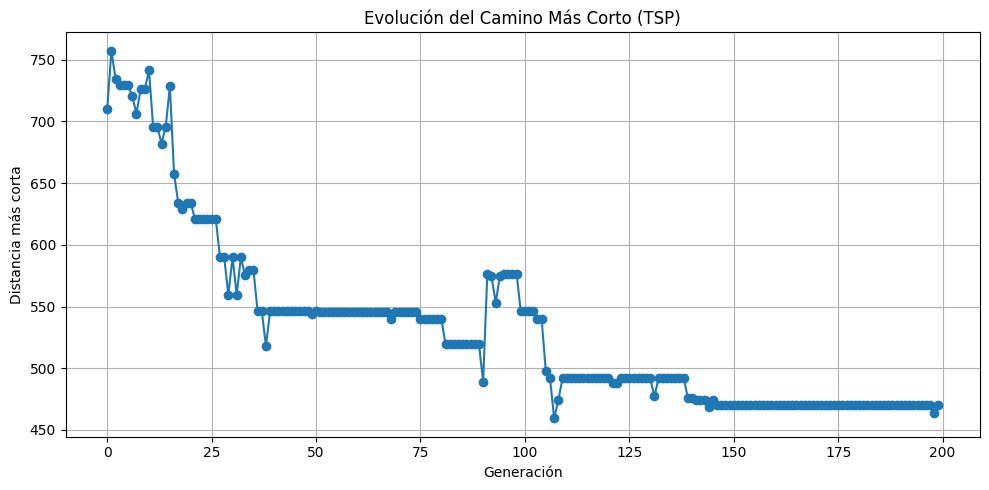

In [12]:
fitness_evolution_visualization(best_distances)

In [ ]:
def check_path(city_df, path_list):
    """
    Genera y guarda gráficos del camino recorrido por cada mejor individuo en cada iteración.

    Args:
        city_df (pd.DataFrame): DataFrame con las ciudades.
        path_list (List[List[int]]): Lista de caminos óptimos por generación.
    """
    for i, path in enumerate(path_list):
        plt.figure(figsize=(8, 6))

        # Coordenadas ordenadas según el camino
        coords = city_df.iloc[path]
        coords = pd.concat([coords, coords.iloc[[0]]]) # cerrar el ciclo

        # Dibujar líneas del recorrido
        plt.plot(coords["coordenada_x"], coords["coordenada_y"], marker='o')

        # Etiquetas de ciudades
        for idx in path:
            city_name = city_df.index[idx]
            x, y = city_df.iloc[idx]
            plt.text(x + 1, y + 1, city_name, fontsize=8)

        plt.title(f"Path Iteración {i + 1}")
        plt.xlabel("Eje X")
        plt.ylabel("Eje Y")
        plt.grid(True)

        # Guardar imagen
        plt.savefig(f"path_evolution/path_iter_{i + 1}.png")
        plt.close()


In [ ]:
check_path(city_df, best_paths)


In [ ]:
import imageio
import os

def path_evolution_gif(image_dir, output_filename="evolution.gif", duration=2):
    """
    Genera un GIF a partir de una secuencia de imágenes PNG en un directorio.

    Args:
        image_dir (str): Ruta al directorio que contiene las imágenes PNG ordenadas.
        output_filename (str): Nombre del archivo GIF de salida.
        duration (float): Duración entre frames en segundos (por defecto 0.5s).

    Returns:
        str: Ruta al archivo GIF generado.
    """
    # Obtener lista ordenada de archivos .png
    png_files = sorted([
        os.path.join(image_dir, f) for f in os.listdir(image_dir)
        if f.lower().endswith('.png')
    ])

    if not png_files:
        raise ValueError("No se encontraron archivos PNG en el directorio especificado.")

    # Leer imágenes y generar el GIF
    images = [imageio.imread(png) for png in png_files]
    gif_path = os.path.join(image_dir, output_filename)
    imageio.mimsave(gif_path, images, duration=duration)

    print(f"GIF generado: {gif_path}")
    return gif_path

path_evolution_gif(r"C:\Users\oriol\Desktop\TallerGA\GA_repo\path_evolution")


GIF generado en: path_evolution/evolution.gif


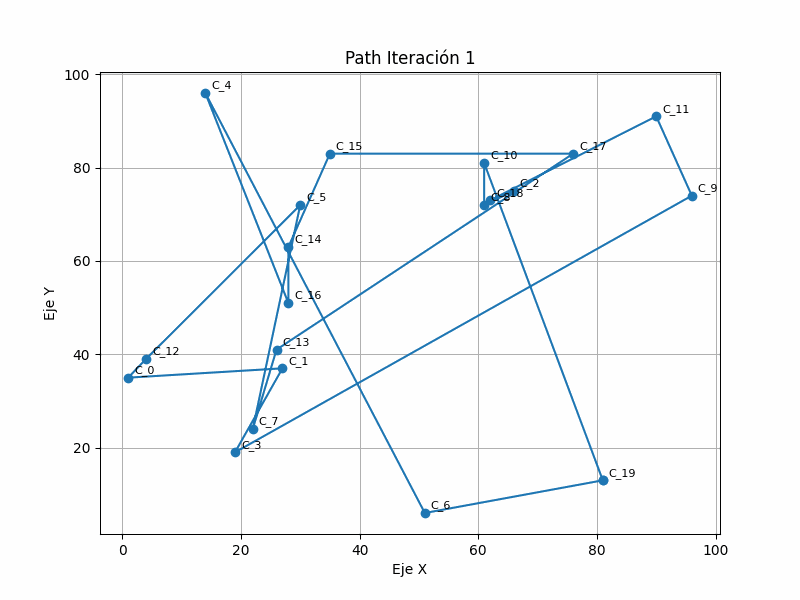

In [13]:
import matplotlib.pyplot as plt
import imageio
import io
import os

def check_path_and_generate_gif(city_df, path_list, output_gif_path="path_evolution/evolution.gif", duration=0.5):
    """
    Genera un GIF directamente desde los caminos sin guardar PNGs en disco.

    Args:
        city_df (pd.DataFrame): DataFrame con las ciudades.
        path_list (List[List[int]]): Lista de caminos óptimos por generación.
        output_gif_path (str): Ruta de salida del archivo GIF.
        duration (float): Duración entre frames en segundos.
    """
    os.makedirs(os.path.dirname(output_gif_path), exist_ok=True)
    frames = []

    for i, path in enumerate(path_list):
        fig, ax = plt.subplots(figsize=(8, 6))

        coords = city_df.iloc[path]
        coords = pd.concat([coords, coords.iloc[[0]]])  # cerrar el ciclo

        ax.plot(coords["coordenada_x"], coords["coordenada_y"], marker='o')

        for idx in path:
            city_name = city_df.index[idx]
            x, y = city_df.iloc[idx]
            ax.text(x + 1, y + 1, city_name, fontsize=8)

        ax.set_title(f"Path Iteración {i + 1}")
        ax.set_xlabel("Eje X")
        ax.set_ylabel("Eje Y")
        ax.grid(True)

        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        frames.append(imageio.v3.imread(buf))  # imageio.v3 for newer versions
        plt.close(fig)

    imageio.mimsave(output_gif_path, frames, duration=duration)
    print(f"GIF generado en: {output_gif_path}")

    return output_gif_path

gif_path = check_path_and_generate_gif(city_df, best_paths)

from IPython.display import Image
Image(filename=gif_path)

